In [16]:
import empca

import numpy as np
import pandas as pd
import sys
from scipy.sparse import dia_matrix
import scipy.sparse.linalg
import math
from pca import pca

# load dataset into Pandas DataFrame
df = pd.read_csv("../predictors/Merged/Weekly/AAPL.csv", names=["Date","dpr","npm","gpm","roa","roe","capital_ratio","de_ratio","cash_ratio","curr_ratio","inv_turn","pay_turn","sale_nwc","rd_sale","accrual","adjusted_close","gdp","gdpr1","gdpr2","cpi","bond20yr","bond30yr","fedfunds","cpir","wpir","unemp","employ","SMA","EMA","STOCH_k","STOCH_d","RSI","MFI","SAR","AD"])
df = df[df.Date<="2017-06-30"]
# 36

In [17]:
from sklearn.preprocessing import StandardScaler

features = ["dpr","npm","gpm","roa","roe","capital_ratio","de_ratio","cash_ratio","curr_ratio","inv_turn","pay_turn","sale_nwc","rd_sale","accrual","adjusted_close","gdp","gdpr1","gdpr2","cpi","bond20yr","bond30yr","fedfunds","cpir","wpir","unemp","employ","SMA","EMA","STOCH_k","STOCH_d","RSI","MFI","SAR","AD"]

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
# y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [18]:
x

array([[-1.78039746, -0.7411942 , -2.08131377, ...,  0.49925845,
         3.93701933, -0.95739792],
       [-1.78039746, -0.7411942 , -2.08131377, ...,  1.45519115,
         3.84778192, -0.95164661],
       [-1.78039746, -0.7411942 , -2.08131377, ...,  1.45519115,
         3.76026553, -0.9376602 ],
       ...,
       [ 0.92927687, -1.73519664, -0.39531872, ...,  0.58830577,
        -0.6271631 ,  3.71834791],
       [ 0.92927687, -1.73519664, -0.39531872, ...,  0.45392018,
        -0.62712085,  3.96991166],
       [ 0.92927687, -1.73519664, -0.39531872, ...,  0.49943083,
        -0.6271462 ,  3.72292677]])

In [19]:
from sklearn.decomposition import PCA
from fancyimpute import KNN

x = KNN(k=5).fit_transform(x)

pca = PCA(n_components=8)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component ' + str(i) for i in range(1,9)])

Imputing row 1/391 with 4 missing, elapsed time: 0.020
Imputing row 101/391 with 0 missing, elapsed time: 0.020
Imputing row 201/391 with 0 missing, elapsed time: 0.020
Imputing row 301/391 with 0 missing, elapsed time: 0.020


In [20]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
0,7.012479,4.388180,-0.029103,-2.119698,-0.368852,1.067981,-0.458072,0.230920
1,7.030295,4.392318,0.013969,-2.553056,0.084548,1.020935,0.349630,0.080445
2,7.015329,4.380887,0.044029,-2.547607,0.177731,1.108822,0.378504,0.076811
3,6.994843,4.372399,0.074653,-2.538887,0.267717,1.202955,0.417089,0.077325
4,7.009705,4.337234,0.121273,-2.561544,0.548720,1.557974,0.525624,0.038582
...,...,...,...,...,...,...,...,...
386,-6.911800,4.121736,-3.476221,1.044679,-1.568877,0.285825,3.421950,0.946033
387,-6.828066,4.058110,-3.252427,0.862776,-0.668961,1.106518,3.536904,0.893652
388,-6.784267,3.982898,-2.946452,1.037924,0.199719,2.368259,3.042901,0.986065
389,-6.861030,4.037160,-3.072559,1.220976,-0.386519,1.936692,2.906652,1.059161


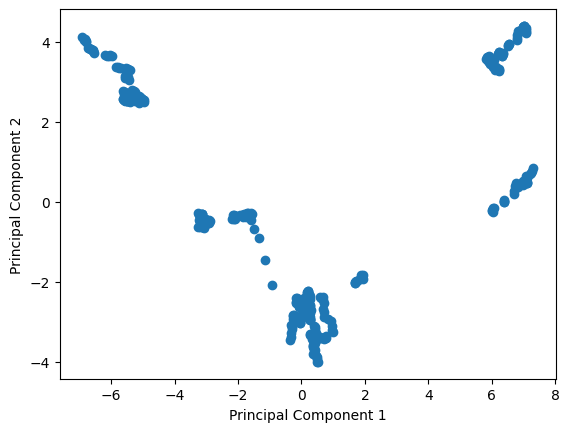

In [21]:
import matplotlib.pyplot as plt

# Create a scatter plot of the first two principal components
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
